In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from datetime import datetime
from sqlalchemy import create_engine
#database connection parameters

#loading data
#agri data
filepath = r"C:\Users\LOQ\saran_guvi\agri\ICRISAT-District Level Data - ICRISAT-District Level Data (1).csv"
df = pd.read_csv(filepath)


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [5]:
# Function to standardize the column names
def standardize_column_names(df):
    new_cols = {}
    for col in df.columns:
        # Standardize Geographical and Year columns
        if col in ['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name']:
            new_name = col.lower().replace(' ', '_')
        else:
            # 1. Remove units in parentheses and standardize metric abbreviations
            # Note: The .lower() converts 'Kg per ha' to 'kg per ha' for consistency
            new_name = col.lower().replace(' (1000 ha)', '_1000_ha')
            new_name = new_name.replace(' (1000 tons)', '_1000_tons')
            new_name = new_name.replace(' (kg per ha)', '_kg_ha') # Yield
            
            # 2. Further cleaning (replace 'and' and spaces)
            new_name = new_name.replace(' and ', '_and_')
            new_name = new_name.replace(' ', '_')
            new_name = new_name.replace('(', '').replace(')', '')
        
        new_cols[col] = new_name
    
    # Rename the columns in the DataFrame
    df.rename(columns=new_cols, inplace=True)
    return df

# Apply the renaming and save the new file
df = standardize_column_names(df)
rename_file_name = "ICRISAT_District_Level_name1.csv"
df.to_csv(rename_file_name,index= False)

In [4]:
print(df.columns)

Index(['dist_code', 'year', 'state_code', 'state_name', 'dist_name',
       'rice_area_1000_ha', 'rice_production_1000_tons', 'rice_yield_kg_ha',
       'wheat_area_1000_ha', 'wheat_production_1000_tons', 'wheat_yield_kg_ha',
       'kharif_sorghum_area_1000_ha', 'kharif_sorghum_production_1000_tons',
       'kharif_sorghum_yield_kg_ha', 'rabi_sorghum_area_1000_ha',
       'rabi_sorghum_production_1000_tons', 'rabi_sorghum_yield_kg_ha',
       'sorghum_area_1000_ha', 'sorghum_production_1000_tons',
       'sorghum_yield_kg_ha', 'pearl_millet_area_1000_ha',
       'pearl_millet_production_1000_tons', 'pearl_millet_yield_kg_ha',
       'maize_area_1000_ha', 'maize_production_1000_tons', 'maize_yield_kg_ha',
       'finger_millet_area_1000_ha', 'finger_millet_production_1000_tons',
       'finger_millet_yield_kg_ha', 'barley_area_1000_ha',
       'barley_production_1000_tons', 'barley_yield_kg_ha',
       'chickpea_area_1000_ha', 'chickpea_production_1000_tons',
       'chickpea_yield_kg_

In [6]:
df.head(10)

,dist_code,year,state_code,state_name,dist_name,rice_area_1000_ha,rice_production_1000_tons,rice_yield_kg_ha,wheat_area_1000_ha,wheat_production_1000_tons,...,sugarcane_yield_kg_ha,cotton_area_1000_ha,cotton_production_1000_tons,cotton_yield_kg_ha,fruits_area_1000_ha,vegetables_area_1000_ha,fruits_and_vegetables_area_1000_ha,potatoes_area_1000_ha,onion_area_1000_ha,fodder_area_1000_ha
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
5,1,1971,14,Chhattisgarh,Durg,581.8,412.9,709.69,44.4,25.8,...,2000.00,0.0,0.0,0.0,5.42,7.48,12.91,0.01,0.54,0.38
6,1,1972,14,Chhattisgarh,Durg,582.2,381.0,654.41,39.6,20.6,...,2000.00,0.0,0.0,0.0,5.48,7.53,13.01,0.01,0.55,0.26
7,1,1973,14,Chhattisgarh,Durg,600.0,471.9,786.50,37.3,18.6,...,6000.00,0.0,0.0,0.0,5.30,7.60,12.90,0.01,0.53,0.14
8,1,1974,14,Chhattisgarh,Durg,587.4,219.0,372.83,36.5,22.4,...,1875.00,0.0,0.0,0.0,5.21,7.44,12.64,0.03,0.45,0.06
9,1,1975,14,Chhattisgarh,Durg,598.3,454.0,758.82,49.2,27.8,...,1750.00,0.0,0.0,0.0,5.11,7.86,12.97,0.05,0.52,0.08


In [7]:
(df == -1).sum()

dist_code                               0
year                                    0
state_code                              0
state_name                              0
dist_name                               0
                                     ... 
vegetables_area_1000_ha               289
fruits_and_vegetables_area_1000_ha    287
potatoes_area_1000_ha                  34
onion_area_1000_ha                    317
fodder_area_1000_ha                   887
Length: 80, dtype: int64

In [8]:
df.isna().sum()

dist_code                             0
year                                  0
state_code                            0
state_name                            0
dist_name                             0
                                     ..
vegetables_area_1000_ha               0
fruits_and_vegetables_area_1000_ha    0
potatoes_area_1000_ha                 0
onion_area_1000_ha                    0
fodder_area_1000_ha                   0
Length: 80, dtype: int64

In [9]:
df.head()

,dist_code,year,state_code,state_name,dist_name,rice_area_1000_ha,rice_production_1000_tons,rice_yield_kg_ha,wheat_area_1000_ha,wheat_production_1000_tons,...,sugarcane_yield_kg_ha,cotton_area_1000_ha,cotton_production_1000_tons,cotton_yield_kg_ha,fruits_area_1000_ha,vegetables_area_1000_ha,fruits_and_vegetables_area_1000_ha,potatoes_area_1000_ha,onion_area_1000_ha,fodder_area_1000_ha
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [16]:
import re
import numpy as np
import pandas as pd
from IPython.display import display

# --- 0) Clean sentinel values first ---
df = df.replace(-1, np.nan)

# --- 1) First: detect ORIGINAL 1000-unit columns and rename ONLY the headers ---

area_1000_cols_raw = [c for c in df.columns if c.endswith('_area_1000_ha')]
prod_1000_cols_raw = [c for c in df.columns if c.endswith('_production_1000_tons')]

rename_map = {}
rename_map.update({c: c.replace('_area_1000_ha', '_area_ha') for c in area_1000_cols_raw})
rename_map.update({c: c.replace('_production_1000_tons', '_production_tons') for c in prod_1000_cols_raw})

df = df.rename(columns=rename_map)

# NOTE: values still represent 1000 ha / 1000 tons.
# Only the NAMES changed to *_area_ha and *_production_tons.

# --- 2) Identify columns by (new) names ---
area_cols  = [c for c in df.columns if re.search(r'_area_ha$', c)]
prod_cols  = [c for c in df.columns if re.search(r'_production_tons$', c)]
yield_cols = [c for c in df.columns if re.search(r'_yield_kg_ha$', c)]

# --- 3) Convert to numeric (safe) ---
for cols in (area_cols, prod_cols, yield_cols):
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# --- 4) Yield consistency check WITHOUT changing values ---

# IMPORTANT:
#   area_col values  = A_1000 (still 1000 ha, even though called *_area_ha)
#   prod_col values  = P_1000 (still 1000 tons, even though called *_production_tons)
#
# Real area (ha)      = A_1000 * 1000
# Real production (t) = P_1000 * 1000
# Yield (kg/ha)       = (P_1000 * 1000 * 1000) / (A_1000 * 1000)
#                     = (P_1000 * 1000) / A_1000

def find_pairs(prefixes):
    pairs = []
    for p in prefixes:
        a = f"{p}_area_ha"
        pr = f"{p}_production_tons"
        y = f"{p}_yield_kg_ha"
        if a in df.columns and pr in df.columns:
            pairs.append((p, a, pr, y if y in df.columns else None))
    return pairs

prefixes = set()
for c in df.columns:
    m = re.match(r'(.+?)_(area_ha|production_tons|yield_kg_ha)$', c)
    if m:
        prefixes.add(m.group(1))

pairs = find_pairs(prefixes)

for p, a, pr, y in pairs:
    denom = df[a]   # A_1000
    df[f"{p}_yield_computed_kg_ha"] = (df[pr] * 1000) / denom.replace(0, np.nan)
    if y:
        diff = (df[f"{p}_yield_computed_kg_ha"] - df[y]).abs()
        rel  = diff / df[y].replace(0, np.nan)
        df[f"{p}_yield_diff_kg_ha"] = diff
        df[f"{p}_yield_rel_error"]  = rel

# --- 5) Simple outlier flags for yields ---
LOW_KG_HA, HIGH_KG_HA = 100, 20000

for ycol in yield_cols:
    flag = ycol.replace('_yield_kg_ha', '_yield_flag')
    df[flag] = np.where(
        (df[ycol].notna()) & ((df[ycol] < LOW_KG_HA) | (df[ycol] > HIGH_KG_HA)),
        'outlier', 'ok'
    )

# --- 6) Quick audit printout ---
summary = []
for p, a, pr, y in pairs:
    cols = [c for c in [
        a, pr, y,
        f"{p}_yield_computed_kg_ha",
        f"{p}_yield_diff_kg_ha",
        f"{p}_yield_rel_error"
    ] if c in df.columns]
    s = df[cols].describe(percentiles=[0.25, 0.5, 0.75]).T
    s['missing']     = df[cols].isna().sum()
    s['non_missing'] = df[cols].notna().sum()
    s['prefix']      = p
    summary.append(s)

audit = pd.concat(summary, axis=0) if summary else pd.DataFrame()

print("NO value conversion applied.")
print("Columns renamed to *_area_ha and *_production_tons,")
print("but values are still in 1000 ha and 1000 tons.\n")

print("Sample columns:")
print([c for c in df.columns if re.search(r'_(area_ha|production_tons|yield_kg_ha)$', c)][:20])

display(audit.head(30))


NO value conversion applied.
Columns renamed to *_area_ha and *_production_tons,
but values are still in 1000 ha and 1000 tons.

Sample columns:
['rice_area_ha', 'rice_production_tons', 'rice_yield_kg_ha', 'wheat_area_ha', 'wheat_production_tons', 'wheat_yield_kg_ha', 'kharif_sorghum_area_ha', 'kharif_sorghum_production_tons', 'kharif_sorghum_yield_kg_ha', 'rabi_sorghum_area_ha', 'rabi_sorghum_production_tons', 'rabi_sorghum_yield_kg_ha', 'sorghum_area_ha', 'sorghum_production_tons', 'sorghum_yield_kg_ha', 'pearl_millet_area_ha', 'pearl_millet_production_tons', 'pearl_millet_yield_kg_ha', 'maize_area_ha', 'maize_production_tons']


,count,mean,std,min,25%,50%,75%,max,missing,non_missing,prefix
soyabean_area_ha,16106.0,13.705227,53.574070,0.0,0.000000e+00,0.000000,0.010000,529.600000,40,16106,soyabean
soyabean_production_tons,16106.0,13.983581,58.658579,0.0,0.000000e+00,0.000000,0.010000,940.800000,40,16106,soyabean
soyabean_yield_kg_ha,16106.0,243.566542,467.873335,0.0,0.000000e+00,0.000000,250.000000,3884.060000,40,16106,soyabean
soyabean_yield_computed_kg_ha,4318.0,897.380644,465.513754,0.0,6.000000e+02,895.781477,1147.148035,3884.057971,11828,4318,soyabean
soyabean_yield_diff_kg_ha,4318.0,3.606714,37.934578,0.0,0.000000e+00,0.001776,0.003477,785.710000,11828,4318,soyabean
soyabean_yield_rel_error,4066.0,0.004821,0.049801,0.0,0.000000e+00,0.000002,0.000005,1.000000,12080,4066,soyabean
finger_millet_area_ha,16126.0,6.256749,22.080259,0.0,0.000000e+00,0.000000,0.900000,261.000000,20,16126,finger_millet
finger_millet_production_tons,16126.0,7.121057,29.057909,0.0,0.000000e+00,0.000000,0.600000,459.980000,20,16126,finger_millet
finger_millet_yield_kg_ha,16126.0,355.290451,573.103790,0.0,0.000000e+00,0.000000,692.655000,9286.860000,20,16126,finger_millet
finger_millet_yield_computed_kg_ha,6123.0,932.165465,568.585735,0.0,5.741992e+02,864.686469,1190.024825,9286.863271,10023,6123,finger_millet


In [17]:
# ✅ Save cleaned dataset
output_path = "cleaned_agriculture_data.csv"
df.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved successfully as: {output_path}")

✅ Cleaned dataset saved successfully as: cleaned_agriculture_data.csv


C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\208139070.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='rice_production_tons', data=top_rice_states, palette='viridis')


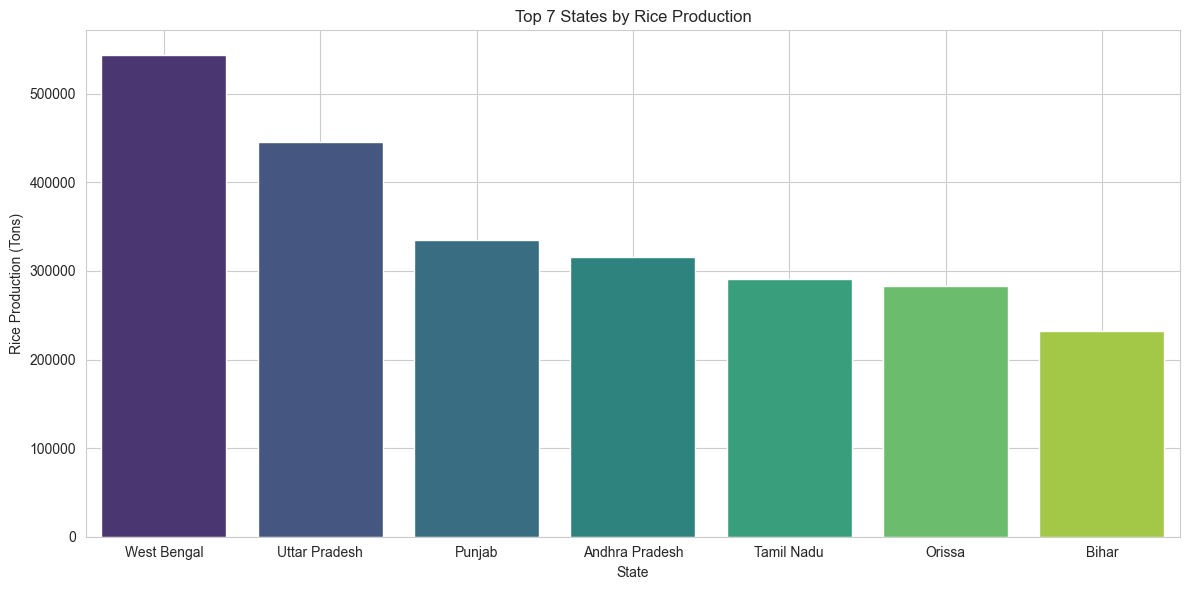

In [18]:
#EDA Visualization
sns.set_style("whitegrid")
# Create a bar plot for Rice Production by State
#Top 7 RICE PRODUCTION State Data(Bar_plot)
plt.figure(figsize=(12, 6))
top_rice_states = df.groupby('state_name')['rice_production_tons'].sum().nlargest(7).reset_index()
sns.barplot(x='state_name', y='rice_production_tons', data=top_rice_states, palette='viridis')
plt.xticks(rotation=360)
plt.grid(axis='x')
plt.title('Top 7 States by Rice Production')
plt.xlabel('State')
plt.ylabel('Rice Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_7_States_by_Rice_Production.png")
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\3750955800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='wheat_production_tons', data=top_wheat_states, palette='viridis')


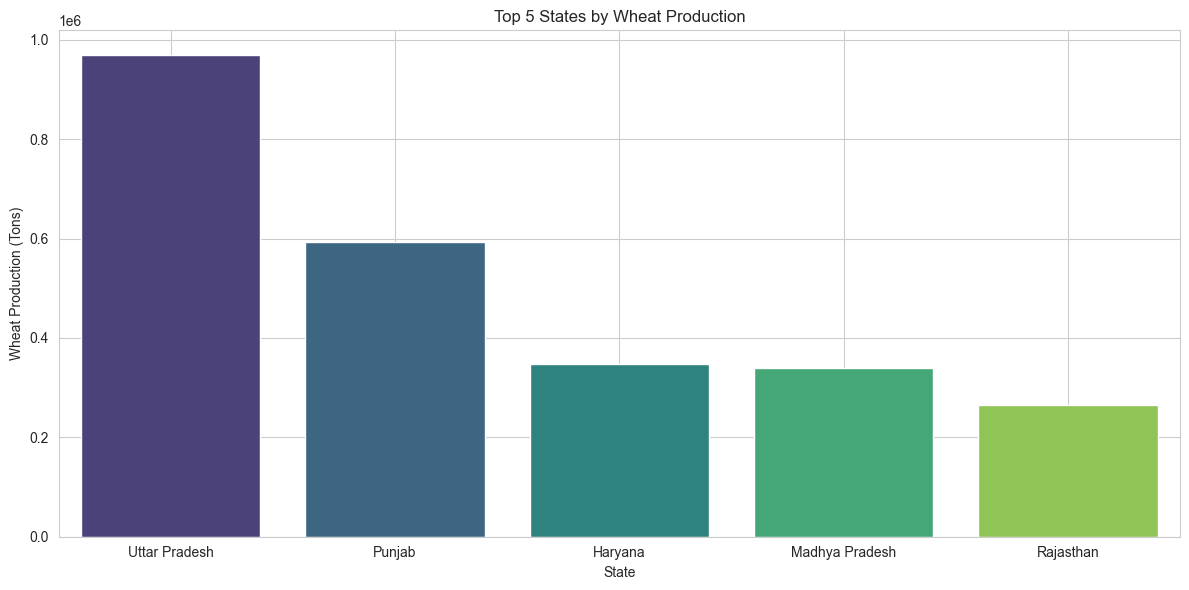

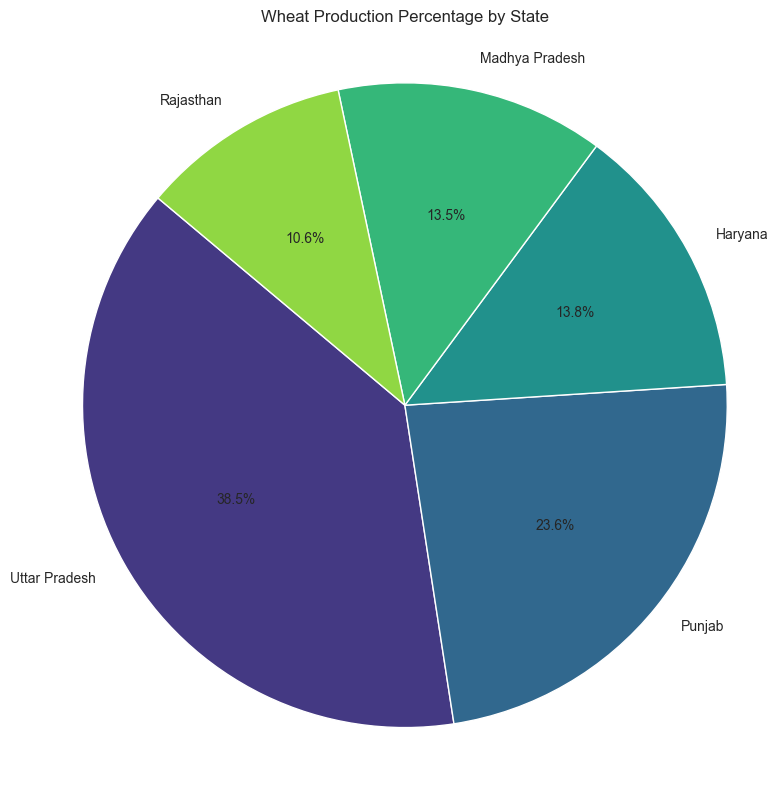

In [19]:
# Top 5 Wheat Producing States Data (Bar chart) and its percentage (%) (Pie chart)
plt.figure(figsize=(12, 6))
top_wheat_states = df.groupby('state_name')['wheat_production_tons'].sum().nlargest(5).reset_index()
sns.barplot(x='state_name', y='wheat_production_tons', data=top_wheat_states, palette='viridis')
# Set the x-ticks to show all state names clearly
plt.xticks(rotation=360)
plt.grid(axis='x')
plt.title('Top 5 States by Wheat Production')
plt.xlabel('State')
plt.ylabel('Wheat Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_5_States_by_Wheat_Production.png")
plt.show()

# Pie chart for Wheat Production percentage by State
plt.figure(figsize=(8, 8))
plt.pie(top_wheat_states['wheat_production_tons'], labels=top_wheat_states['state_name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=len(top_wheat_states)))
plt.title('Wheat Production Percentage by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Wheat_Production_Percentage_by_State.png")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\548670844.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='oilseeds_production_tons', data=top_oilseed_states, palette='viridis')


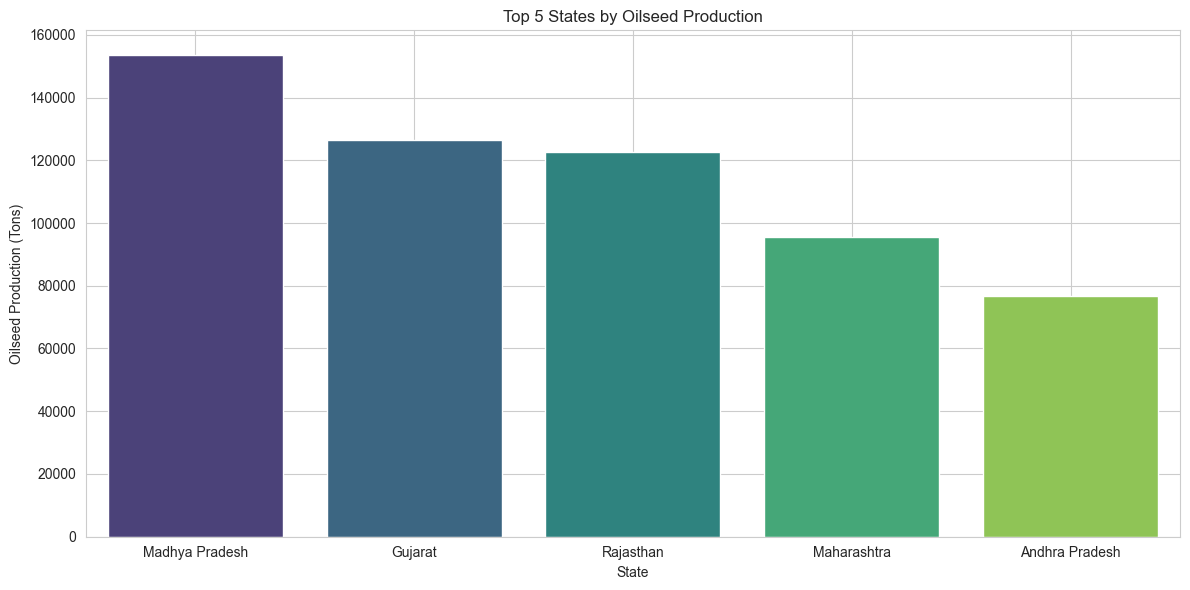

In [20]:
#Oil seed production by top 5 states
plt.figure(figsize=(12, 6))
top_oilseed_states = df.groupby('state_name')['oilseeds_production_tons'].sum().nlargest(5).reset_index()
sns.barplot(x='state_name', y='oilseeds_production_tons', data=top_oilseed_states, palette='viridis')
plt.xticks(rotation=360)
plt.grid(axis='x')
plt.title('Top 5 States by Oilseed Production')
plt.xlabel('State')
plt.ylabel('Oilseed Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_5_States_by_Oilseed_Production.png")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\3500514986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='sunflower_production_tons', data=top_sunflower_states, palette='viridis')


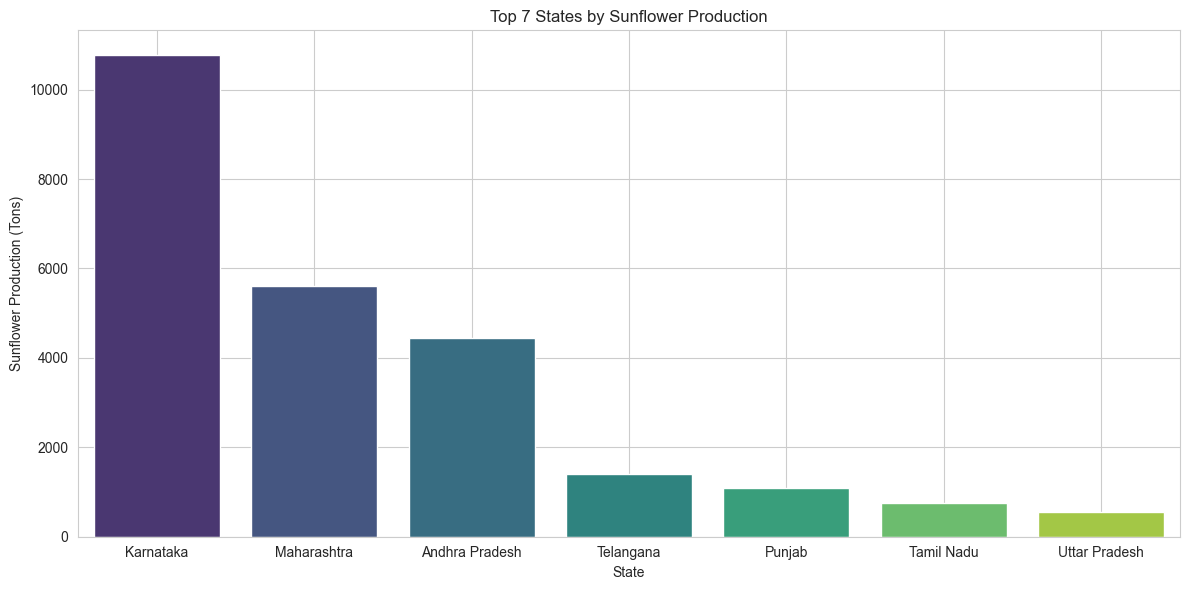

In [21]:
#Top 7 SUNFLOWER PRODUCTION  State

plt.figure(figsize=(12, 6))
top_sunflower_states = df.groupby('state_name')['sunflower_production_tons'].sum().nlargest(7).reset_index()
sns.barplot(x='state_name', y='sunflower_production_tons', data=top_sunflower_states, palette='viridis')
plt.xticks(rotation=360)        
plt.grid(axis='x')
plt.title('Top 7 States by Sunflower Production')   
plt.xlabel('State')
plt.ylabel('Sunflower Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_7_States_by_Sunflower_Production.png")
plt.show()  
#End of EDA Visualization

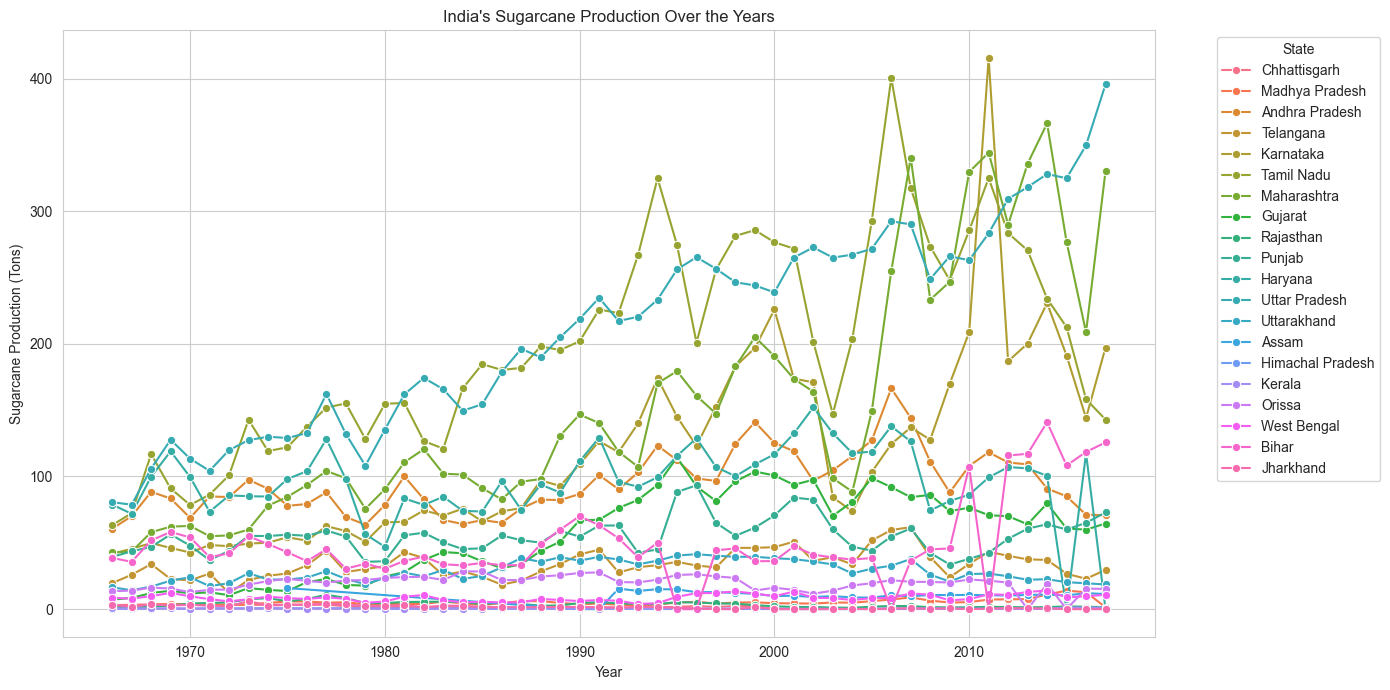

In [22]:
# India's Sugarcane production over the years (line plot)
plt.figure(figsize=(14, 7))
# use the standardized column names present in df
sns.lineplot(data=df, x='year', y='sugarcane_production_tons', hue='state_name', marker='o', err_style=None)
plt.title("India's Sugarcane Production Over the Years")
plt.xlabel('Year')
plt.ylabel('Sugarcane Production (Tons)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\India_Sugarcane_Production_Over_Years.png")
plt.show()


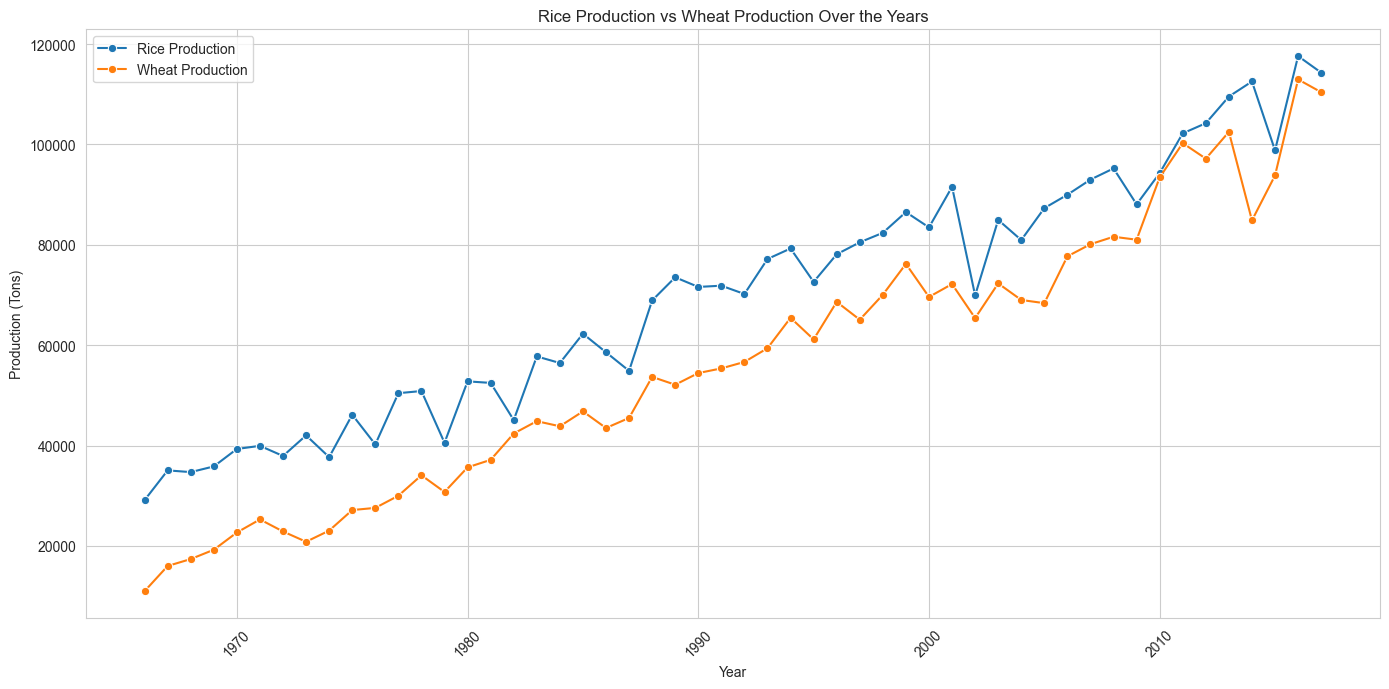

In [23]:
#Rice Production Vs Wheat Production (Last 50y)
plt.figure(figsize=(14, 7))
# aggregate production by year (use standardized column names)
yearly = df.groupby('year')[['rice_production_tons', 'wheat_production_tons']].sum().reset_index()
sns.lineplot(data=yearly, x='year', y='rice_production_tons', label='Rice Production', marker='o')
sns.lineplot(data=yearly, x='year', y='wheat_production_tons', label='Wheat Production', marker='o')
plt.title('Rice Production vs Wheat Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Rice_vs_Wheat_Production_Over_Years.png")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\2100746444.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dist_name', y='rice_production_tons', data=wb_rice_production, palette='viridis')


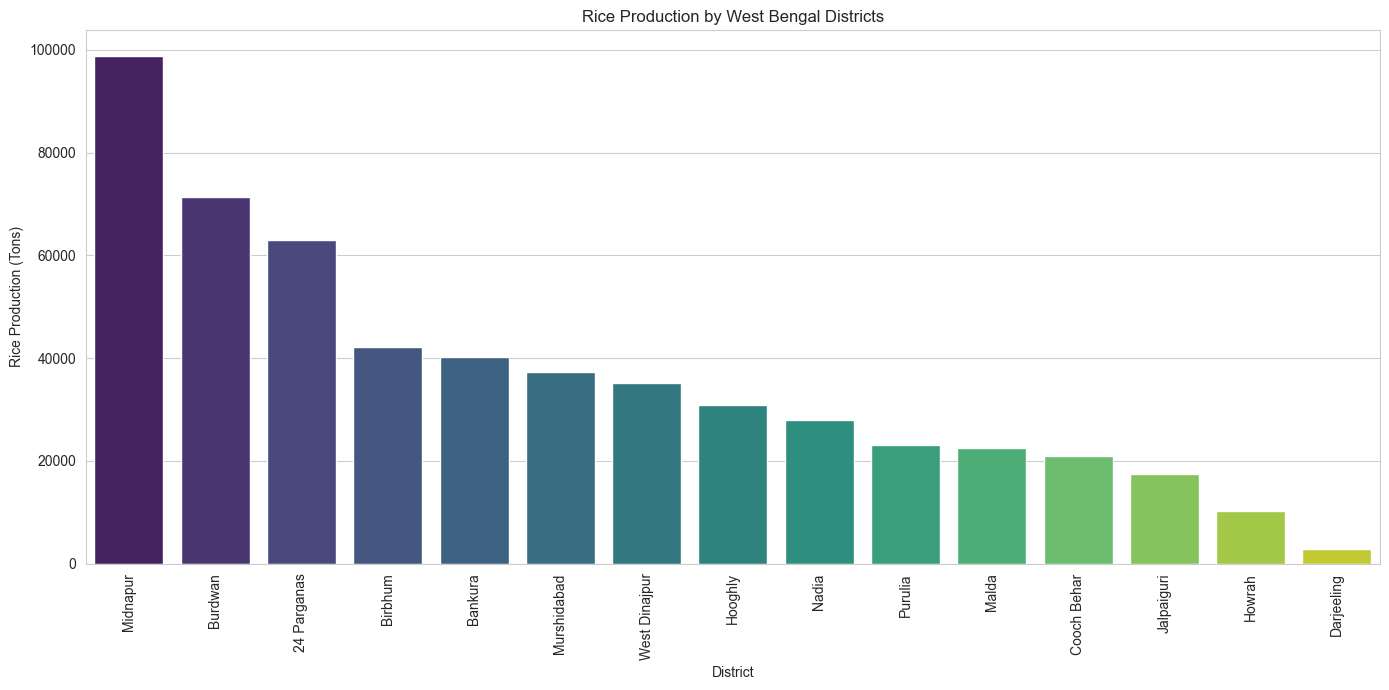

In [24]:
# Rice Production By West Bengal Districts
plt.figure(figsize=(14, 7))
# use standardized column names present in df: state_name, dist_name, rice_production_tons
wb_rice_production = (
	df[df['state_name'] == 'West Bengal']
	.groupby('dist_name', as_index=False)['rice_production_tons']
	.sum()
	.sort_values('rice_production_tons', ascending=False)
)
sns.barplot(x='dist_name', y='rice_production_tons', data=wb_rice_production, palette='viridis')
plt.xticks(rotation=90)
plt.title('Rice Production by West Bengal Districts')
plt.xlabel('District')
plt.ylabel('Rice Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Rice_Production_by_West_Bengal_Districts.png")
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\2274092097.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='wheat_production_tons', data=top_up_wheat_years, palette='viridis')


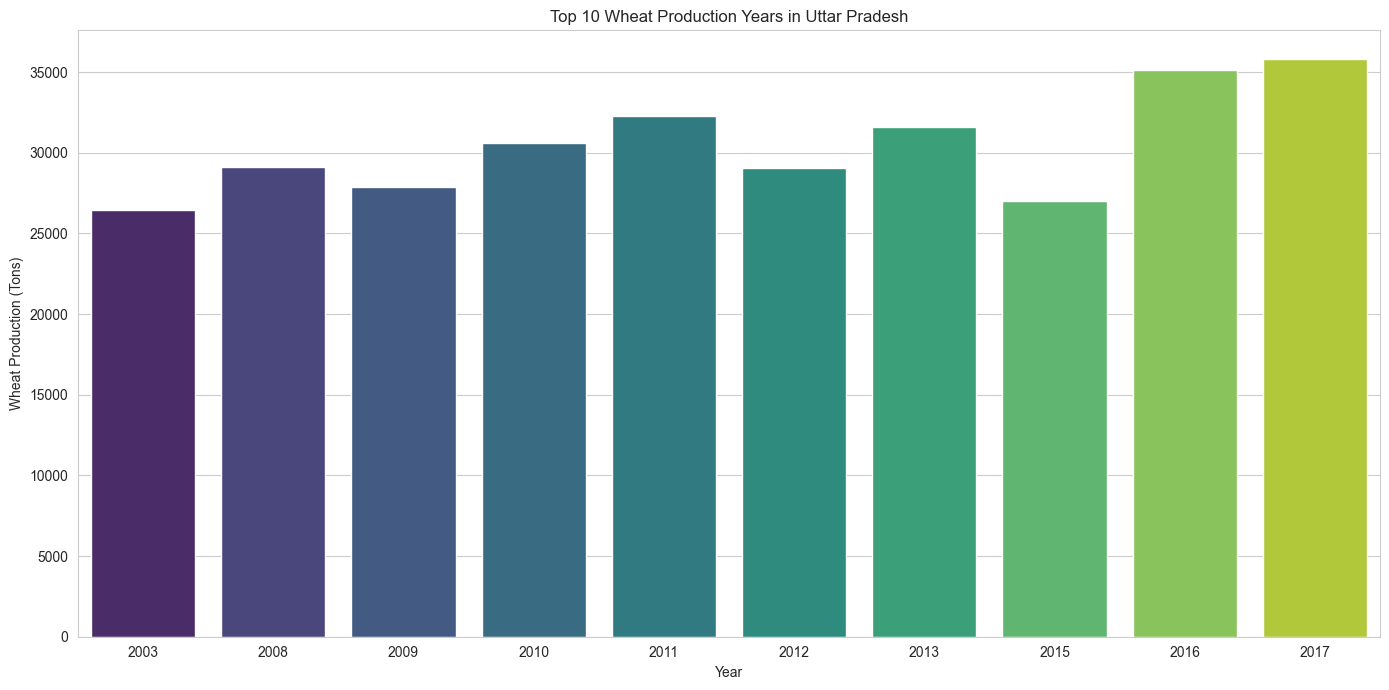

In [25]:
# Top 10 Wheat Production Years From Uttar Pradesh (using standardized column names)

plt.figure(figsize=(14, 7))
# use standardized column names present in df
up_wheat_production = (
	df[df['state_name'] == 'Uttar Pradesh']
	.groupby('year', as_index=False)['wheat_production_tons']
	.sum()
)
top_up_wheat_years = up_wheat_production.nlargest(10, 'wheat_production_tons')
sns.barplot(x='year', y='wheat_production_tons', data=top_up_wheat_years, palette='viridis')
plt.title('Top 10 Wheat Production Years in Uttar Pradesh')
plt.xlabel('Year')
plt.ylabel('Wheat Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_10_Wheat_Production_Years_UP.png")
plt.show()

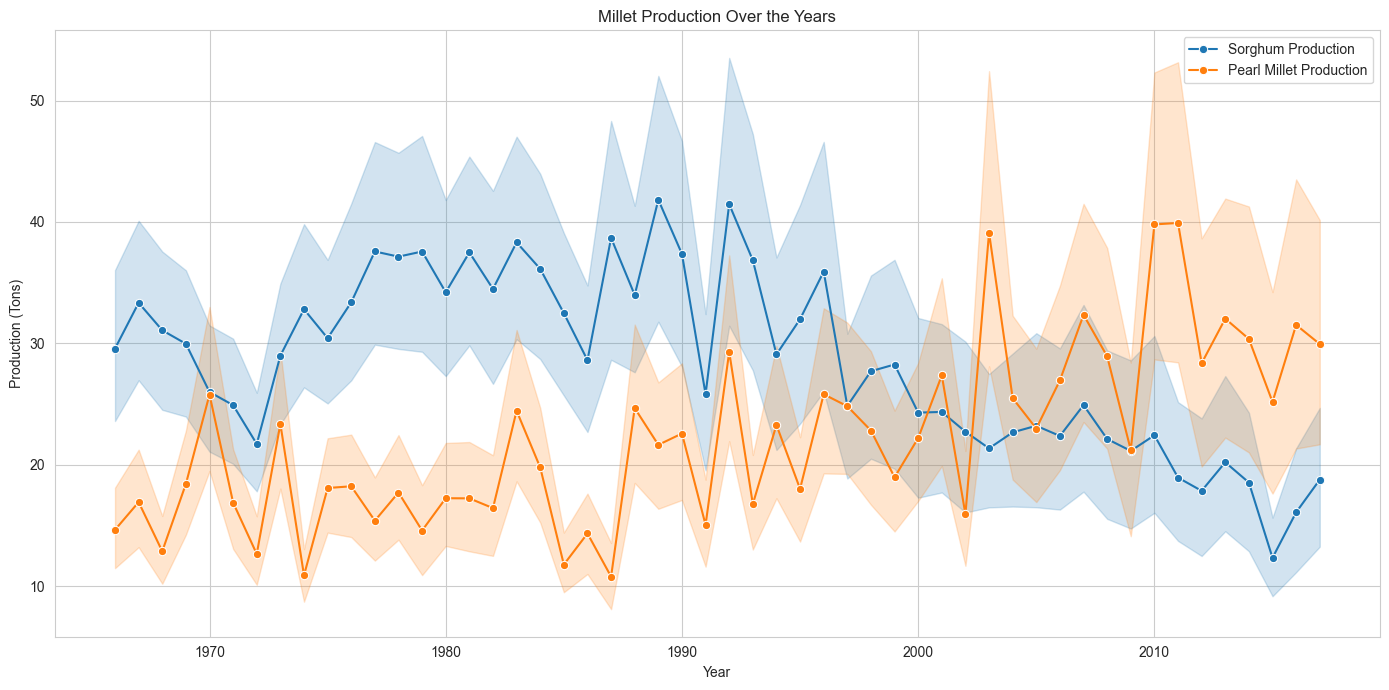

In [26]:
#Millet Production (Last 50y)
plt.figure(figsize=(14, 7))
# use the standardized column names present in df
sns.lineplot(data=df, x='year', y='sorghum_production_tons', label='Sorghum Production', marker='o')
sns.lineplot(data=df, x='year', y='pearl_millet_production_tons', label='Pearl Millet Production', marker='o')
plt.title('Millet Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Millet_Production_Over_Years.png")
plt.show()

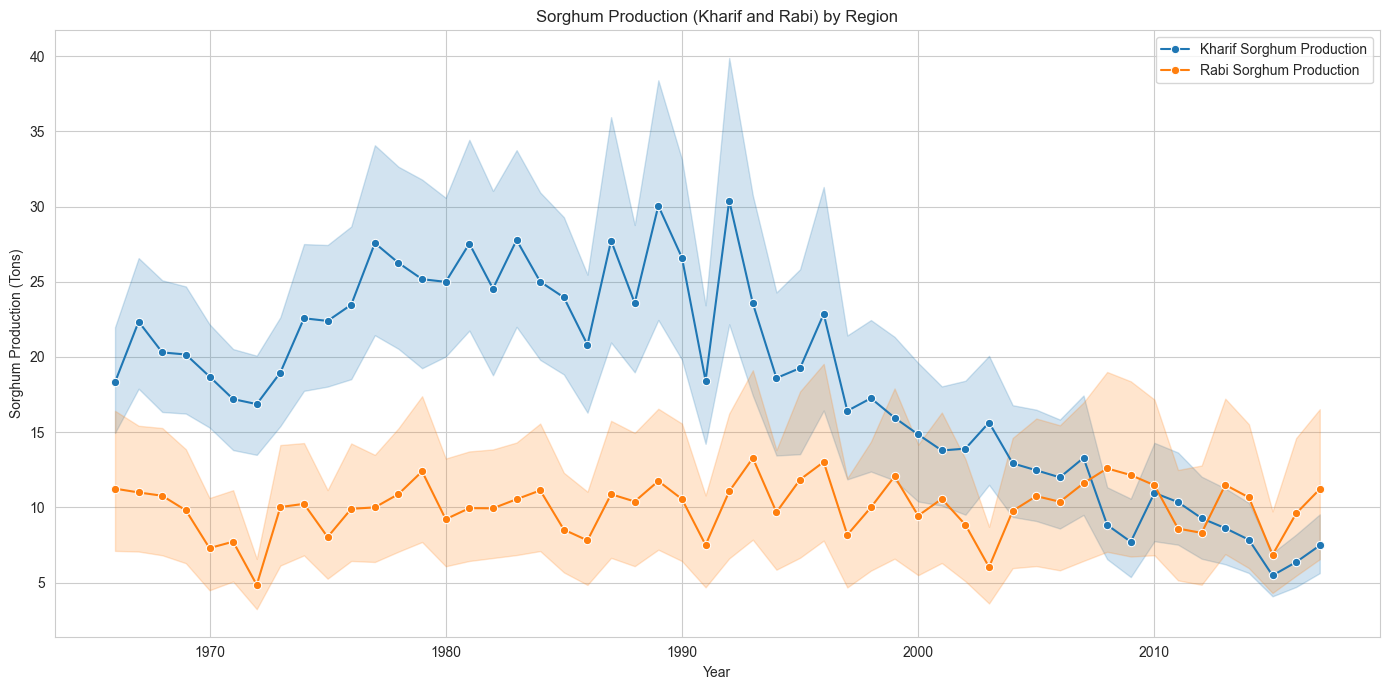

In [27]:
#Sorghum Production (Kharif and Rabi) by Region
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='kharif_sorghum_production_tons', label='Kharif Sorghum Production', marker='o')
sns.lineplot(data=df, x='year', y='rabi_sorghum_production_tons', label='Rabi Sorghum Production', marker='o')
plt.title('Sorghum Production (Kharif and Rabi) by Region') 
plt.xlabel('Year')
plt.ylabel('Sorghum Production (Tons)')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Sorghum_Production_Kharif_Rabi_by_Region.png")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\3840774728.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='groundnut_production_tons', data=top_groundnut_states, palette='viridis')


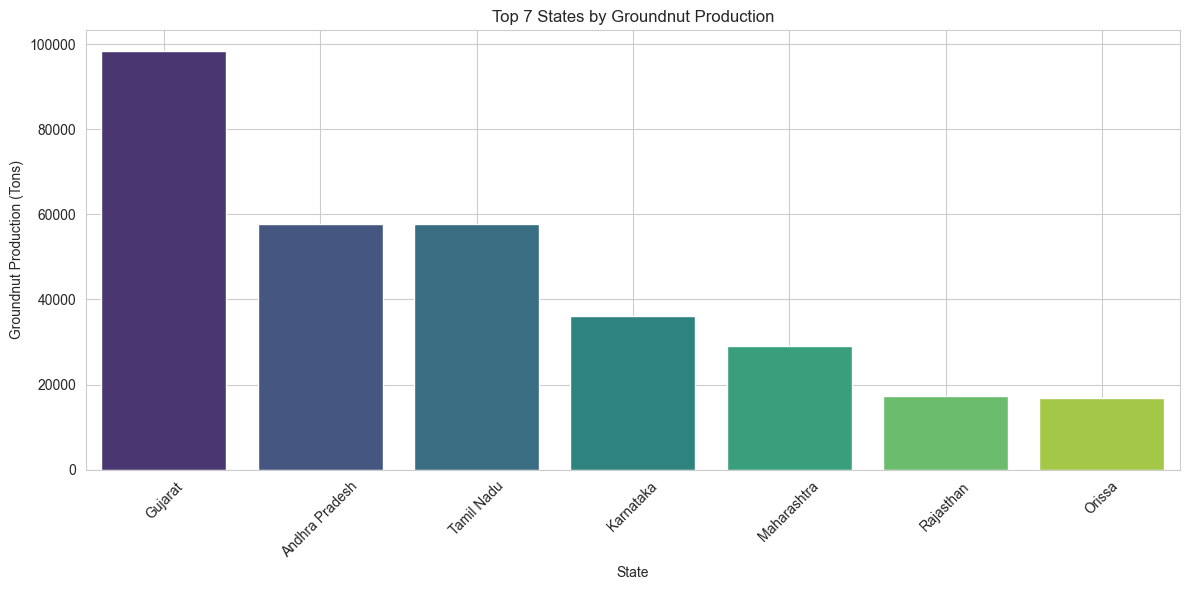

In [28]:
# Top 7 States for Groundnut Production
plt.figure(figsize=(12, 6))
# Use standardized column names present in df: 'state_name' and 'groundnut_production_tons'
top_groundnut_states = df.groupby('state_name')['groundnut_production_tons'].sum().nlargest(7).reset_index()
sns.barplot(x='state_name', y='groundnut_production_tons', data=top_groundnut_states, palette='viridis')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.title('Top 7 States by Groundnut Production')
plt.xlabel('State')
plt.ylabel('Groundnut Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_7_States_by_Groundnut_Production.png")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\4242694880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='soyabean_production_tons', data=top_soybean_states, palette='viridis')


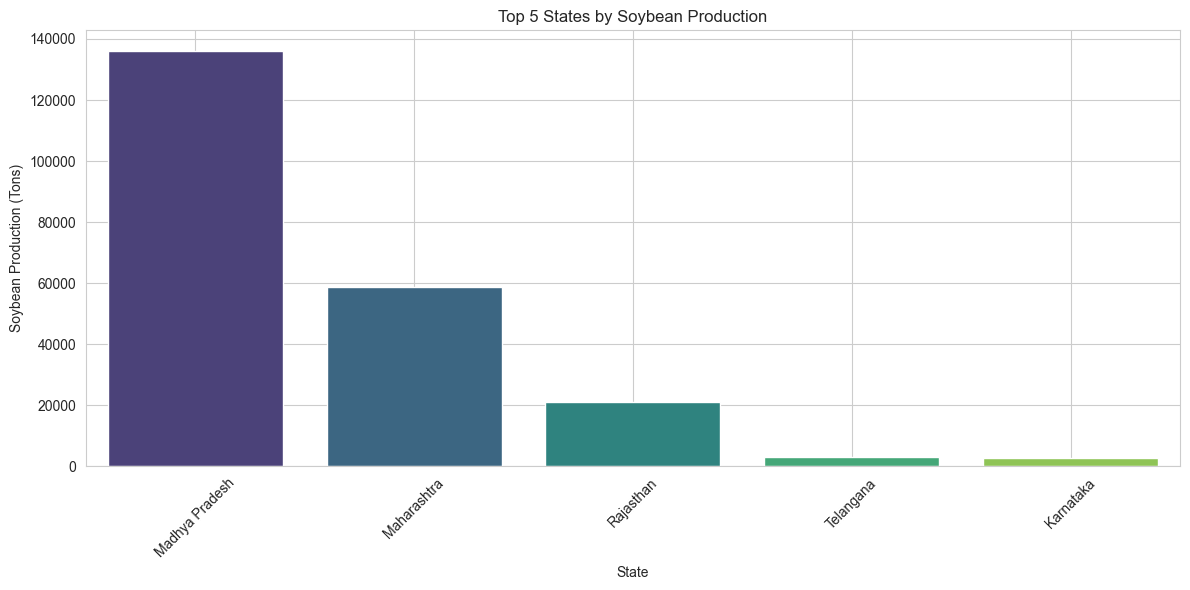

In [29]:
#Soybean Production by Top 5 States and Yield Efficiency
plt.figure(figsize=(12, 6))
top_soybean_states = df.groupby('state_name')['soyabean_production_tons'].sum().nlargest(5).reset_index()
sns.barplot(x='state_name', y='soyabean_production_tons', data=top_soybean_states, palette='viridis')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.title('Top 5 States by Soybean Production')
plt.xlabel('State')
plt.ylabel('Soybean Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_5_States_by_Soybean_Production.png")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20288\2209225791.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='oilseeds_production_tons', data=top_oilseed_states, palette='viridis')


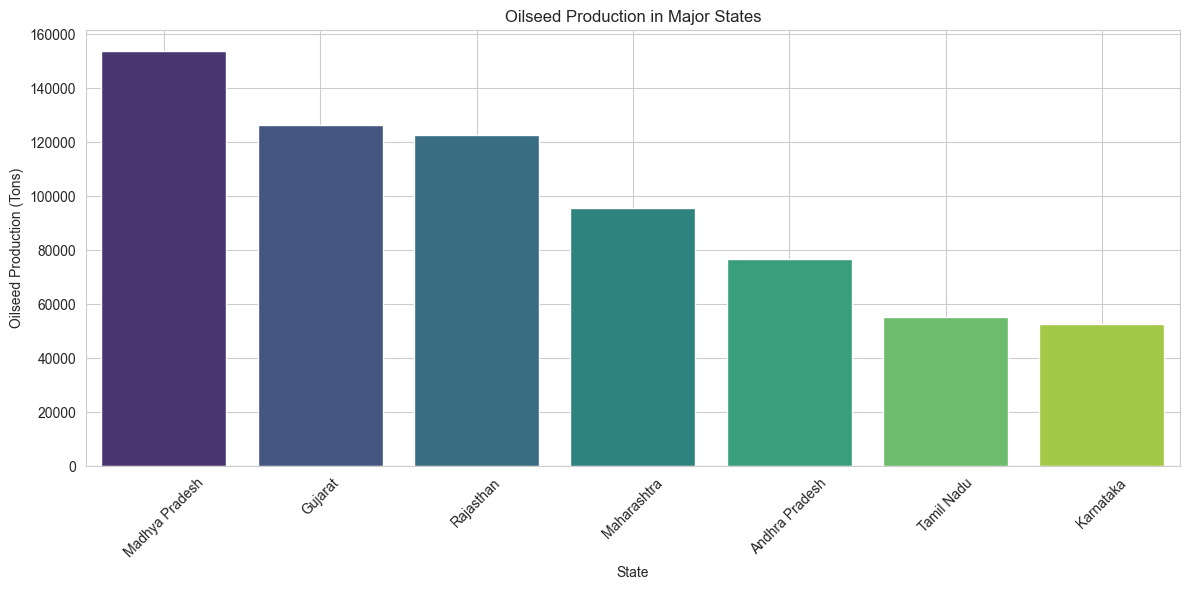

In [30]:
# Oilseed Production in Major States (use standardized column names already in df)
plt.figure(figsize=(12, 6))
top_oilseed_states = df.groupby('state_name')['oilseeds_production_tons'].sum().nlargest(7).reset_index()
sns.barplot(x='state_name', y='oilseeds_production_tons', data=top_oilseed_states, palette='viridis')
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.title('Oilseed Production in Major States')
plt.xlabel('State')
plt.ylabel('Oilseed Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Oilseed_Production_in_Major_States.png")
plt.show()

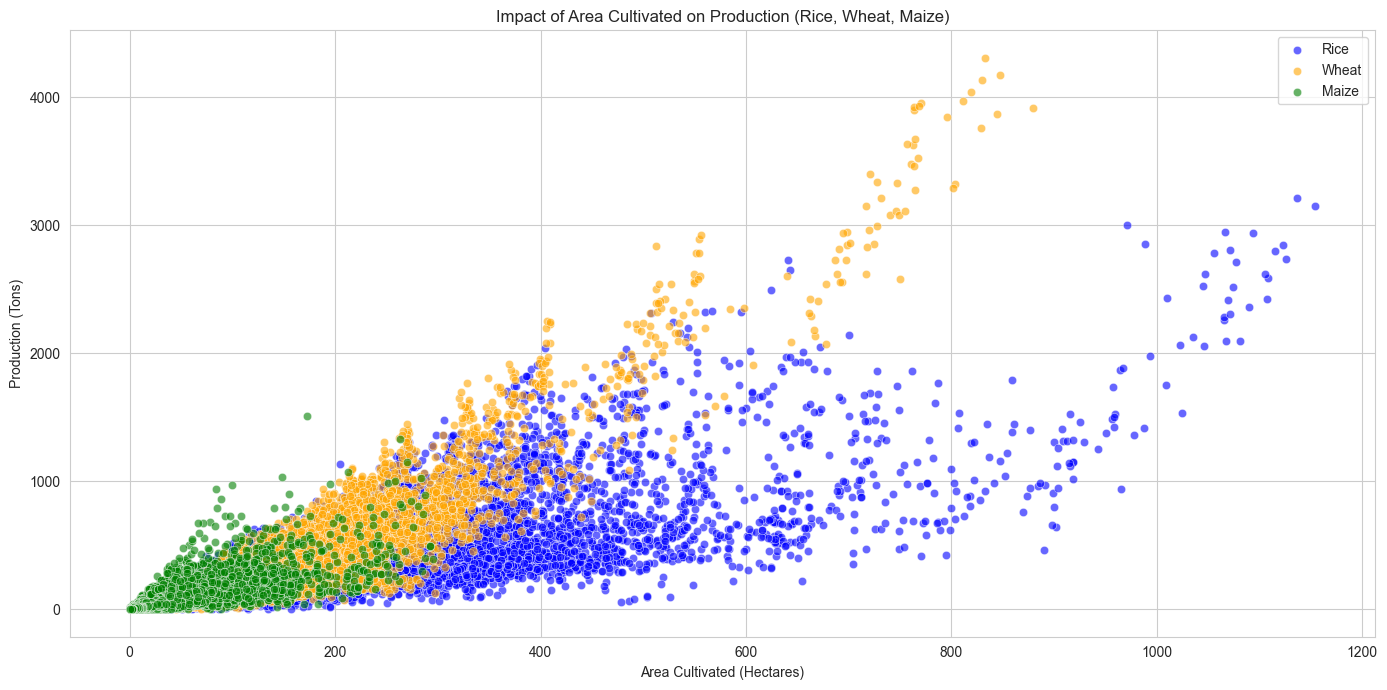

In [31]:
# Impact of Area Cultivated on Production (Rice, Wheat, Maize)
plt.figure(figsize=(14, 7))

# use standardized column names present in df
sns.scatterplot(data=df, x='rice_area_ha', y='rice_production_tons', label='Rice', color='blue', alpha=0.6)
sns.scatterplot(data=df, x='wheat_area_ha', y='wheat_production_tons', label='Wheat', color='orange', alpha=0.6)
sns.scatterplot(data=df, x='maize_area_ha', y='maize_production_tons', label='Maize', color='green', alpha=0.6)

plt.title('Impact of Area Cultivated on Production (Rice, Wheat, Maize)')
plt.xlabel('Area Cultivated (Hectares)')
plt.ylabel('Production (Tons)')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Impact_of_Area_Cultivated_on_Production.png")
plt.show()

In [32]:
df.columns.to_list()

['dist_code',
 'year',
 'state_code',
 'state_name',
 'dist_name',
 'rice_area_ha',
 'rice_production_tons',
 'rice_yield_kg_ha',
 'wheat_area_ha',
 'wheat_production_tons',
 'wheat_yield_kg_ha',
 'kharif_sorghum_area_ha',
 'kharif_sorghum_production_tons',
 'kharif_sorghum_yield_kg_ha',
 'rabi_sorghum_area_ha',
 'rabi_sorghum_production_tons',
 'rabi_sorghum_yield_kg_ha',
 'sorghum_area_ha',
 'sorghum_production_tons',
 'sorghum_yield_kg_ha',
 'pearl_millet_area_ha',
 'pearl_millet_production_tons',
 'pearl_millet_yield_kg_ha',
 'maize_area_ha',
 'maize_production_tons',
 'maize_yield_kg_ha',
 'finger_millet_area_ha',
 'finger_millet_production_tons',
 'finger_millet_yield_kg_ha',
 'barley_area_ha',
 'barley_production_tons',
 'barley_yield_kg_ha',
 'chickpea_area_ha',
 'chickpea_production_tons',
 'chickpea_yield_kg_ha',
 'pigeonpea_area_ha',
 'pigeonpea_production_tons',
 'pigeonpea_yield_kg_ha',
 'minor_pulses_area_ha',
 'minor_pulses_production_tons',
 'minor_pulses_yield_kg_ha',


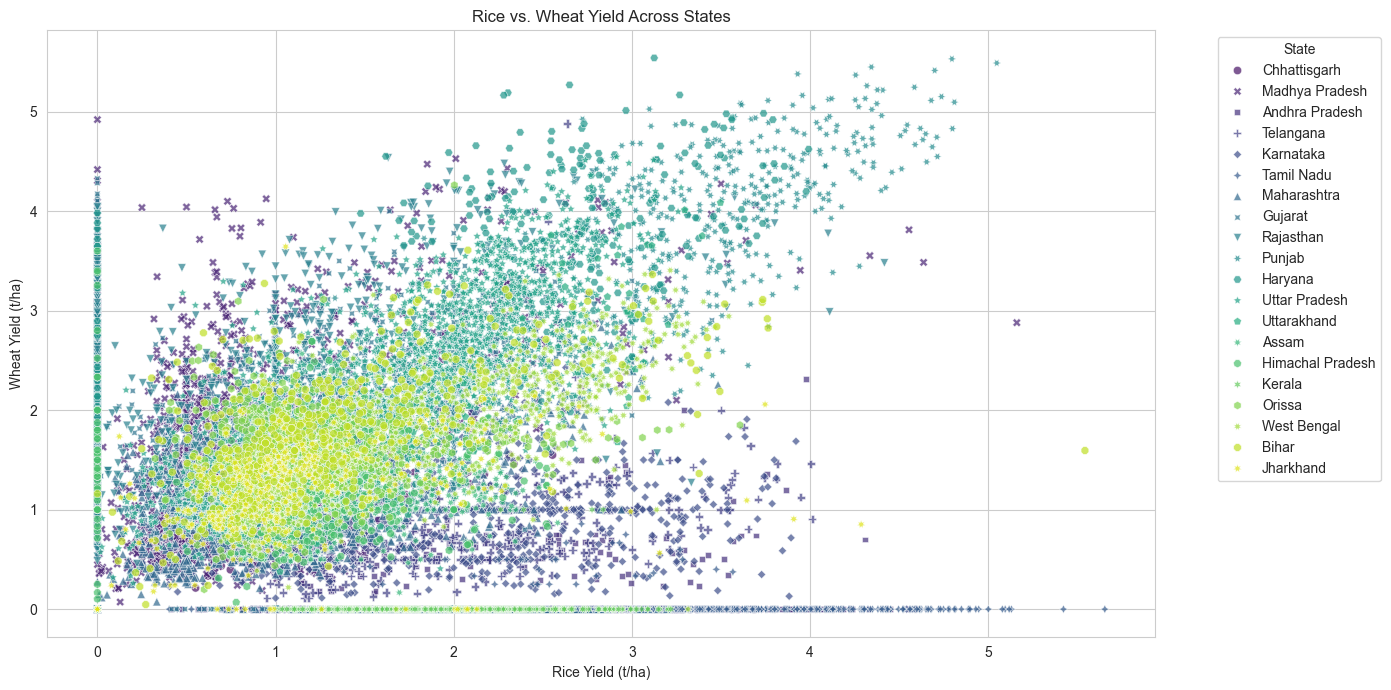

In [33]:
# Rice vs. Wheat Yield Across States (use correct column names and convert to t/ha)
plt.figure(figsize=(14, 7))
# convert kg/ha -> t/ha for plotting (columns in df are rice_yield_kg_ha and wheat_yield_kg_ha)
plot_df = df.assign(
	rice_yield_t_ha = df['rice_yield_kg_ha'] / 1000.0,
	wheat_yield_t_ha = df['wheat_yield_kg_ha'] / 1000.0
)

sns.scatterplot(
	data=plot_df,
	x='rice_yield_t_ha',
	y='wheat_yield_t_ha',
	hue='state_name',
	style='state_name',
	palette='viridis',
	alpha=0.7
)

plt.title('Rice vs. Wheat Yield Across States')
plt.xlabel('Rice Yield (t/ha)')
plt.ylabel('Wheat Yield (t/ha)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Rice_vs_Wheat_Yield_Across_States.png")
plt.show()

In [34]:

import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [35]:
#connect to pgadmin
connection = psycopg2.connect(
    host = "localhost",
    user = "postgres",
    password = "moon123",
    port = 5432
)
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
mediator = connection.cursor()
mediator.execute("select version()")
version = mediator.fetchone()
print(f"the database version is: {version}")

the database version is: ('PostgreSQL 15.12, compiled by Visual C++ build 1943, 64-bit',)


In [39]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
# connect to pgadmin and create a database if it doesn't already exist
connection = psycopg2.connect(
    host = "localhost",
    user = "postgres",
    password = "moon123",
    port = 5432
)
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
mediator = connection.cursor()

# check whether the database exists first to avoid DuplicateDatabase error
mediator.execute("SELECT 1 FROM pg_database WHERE datname = %s", ("pro_agri_db",))
exists = mediator.fetchone()
if not exists:
    mediator.execute("CREATE DATABASE pro_agri_db")
else:
    print("Database 'pro_agri_db' already exists. Skipping creation.")

mediator.close()
connection.close()

# Connect to the (existing or newly created) database
connection = psycopg2.connect(
    host = "localhost", 
    user = "postgres",
    password = "moon123",
    port = 5432,
    dbname = "pro_agri_db"
)
mediator = connection.cursor()
# Create a table to store the cleaned agricultural data
create_table_query = """CREATE TABLE IF NOT EXISTS dist_agri (
   id SERIAL PRIMARY KEY,
   District_Code VARCHAR(100), 
   Year INTEGER,
   State_Code VARCHAR(100),
    State VARCHAR(100),
    District VARCHAR(100),
    rice_area FLOAT,
    rice_production FLOAT,
    rice_yield FLOAT,
    wheat_area FLOAT,
    wheat_production FLOAT,
    wheat_yield FLOAT,
    kharif_sorghum_area FLOAT,
    kharif_sorghum_production FLOAT,
    kharif_sorghum_yield FLOAT,
    rabi_sorghum_area FLOAT,
    rabi_sorghum_production FLOAT,
    rabi_sorghum_yield FLOAT,
    sorghum_area FLOAT,
    sorghum_production FLOAT,
    sorghum_yield FLOAT,
    pearl_millet_area FLOAT,
    pearl_millet_production FLOAT,
    pearl_millet_yield FLOAT,
    maize_area FLOAT,
    maize_production FLOAT,
    maize_yield FLOAT,
    finger_millet_area FLOAT,
    finger_millet_production FLOAT,
    finger_millet_yield FLOAT,
    barley_area FLOAT,
    barley_production FLOAT,
    barley_yield FLOAT,
    chickpea_area FLOAT,
    chickpea_production FLOAT,
    chickpea_yield FLOAT,
    pigeonpea_area FLOAT,
    pigeonpea_production FLOAT,
    pigeonpea_yield FLOAT,
    minor_pulses_area FLOAT,
    minor_pulses_production FLOAT,
    minor_pulses_yield FLOAT,
    groundnut_area FLOAT,
    groundnut_production FLOAT,
    groundnut_yield FLOAT,
    sesamum_area FLOAT,
    sesamum_production FLOAT,
    sesamum_yield FLOAT,
    rapeseed_mustard_area FLOAT,
    rapeseed_mustard_production FLOAT,
    rapeseed_mustard_yield FLOAT,
    safflower_area FLOAT,
    safflower_production FLOAT,
    safflower_yield FLOAT,
    castor_area FLOAT,
    castor_production FLOAT,
    castor_yield FLOAT,
    linseed_area FLOAT,
    linseed_production FLOAT,
    linseed_yield FLOAT,
    sunflower_area FLOAT,
    sunflower_production FLOAT,
    sunflower_yield FLOAT,
    soyabean_area FLOAT,
    soyabean_production FLOAT,
    soyabean_yield FLOAT,
    oilseeds_area FLOAT,
    oilseeds_production FLOAT,
    oilseeds_yield FLOAT,
    sugarcane_area FLOAT,
    sugarcane_production FLOAT,
    sugarcane_yield FLOAT,
    cotton_area FLOAT,
    cotton_production FLOAT,
    cotton_yield FLOAT,
    fruits_area FLOAT,
    vegetables_area FLOAT,
    fruits_vegetables_area FLOAT,
    potatoes_area FLOAT,
    onion_area FLOAT,
    fodder_area FLOAT
);"""

# Execute the create table query
mediator.execute(create_table_query)
# Commit the changes and close the connection
connection.commit()
mediator.close()
connection.close()
# 

Database 'pro_agri_db' already exists. Skipping creation.


In [ ]:
insert_query = """
INSERT INTO dist_agri (
    District_Code, Year, State_Code, State, District,
    rice_area, rice_production, rice_yield,
    wheat_area, wheat_production, wheat_yield,
    kharif_sorghum_area, kharif_sorghum_production, kharif_sorghum_yield,
    rabi_sorghum_area, rabi_sorghum_production, rabi_sorghum_yield,
    sorghum_area, sorghum_production, sorghum_yield,
    pearl_millet_area, pearl_millet_production, pearl_millet_yield,
    maize_area, maize_production, maize_yield,
    finger_millet_area, finger_millet_production, finger_millet_yield,
    barley_area, barley_production, barley_yield,
    chickpea_area, chickpea_production, chickpea_yield,
    pigeonpea_area, pigeonpea_production, pigeonpea_yield,
    minor_pulses_area, minor_pulses_production, minor_pulses_yield,
    groundnut_area, groundnut_production, groundnut_yield,
    sesamum_area, sesamum_production, sesamum_yield,
    rapeseed_mustard_area, rapeseed_mustard_production, rapeseed_mustard_yield,
    safflower_area, safflower_production, safflower_yield,
    castor_area, castor_production, castor_yield,
    linseed_area, linseed_production, linseed_yield,
    sunflower_area, sunflower_production, sunflower_yield,
    soyabean_area, soyabean_production, soyabean_yield,
    oilseeds_area, oilseeds_production, oilseeds_yield,
    sugarcane_area, sugarcane_production, sugarcane_yield,
    cotton_area, cotton_production, cotton_yield,
    fruits_area, vegetables_area, fruits_vegetables_area,
    potatoes_area, onion_area, fodder_area
) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
 %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s, %s, %s, %s, %s, %s, %s, %s, %s,
 %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
 %s, %s, %s, %s, %s, %s, %s,%s,%s,%s,%s,%s, %s, %s, 
 %s, %s, %s, %s, %s, %s, %s, %s, %s, %s


);
 """

#prepare data for insertion (build from canonical fields_order to guarantee length matches SQL placeholders)
# fields_order must match the order of VALUES in the SQL string above (we validated this earlier)
fields_order = [
    'dist_code','year','state_code','state_name','dist_name',
    'rice_area_ha','rice_production_tons','rice_yield_kg_ha',
    'wheat_area_ha','wheat_production_tons','wheat_yield_kg_ha',
    'kharif_sorghum_area_ha','kharif_sorghum_production_tons','kharif_sorghum_yield_kg_ha',
    'rabi_sorghum_area_ha','rabi_sorghum_production_tons','rabi_sorghum_yield_kg_ha',
    'sorghum_area_ha','sorghum_production_tons','sorghum_yield_kg_ha',
    'pearl_millet_area_ha','pearl_millet_production_tons','pearl_millet_yield_kg_ha',
    'maize_area_ha','maize_production_tons','maize_yield_kg_ha',
    'finger_millet_area_ha','finger_millet_production_tons','finger_millet_yield_kg_ha',
    'barley_area_ha','barley_production_tons','barley_yield_kg_ha',
    'chickpea_area_ha','chickpea_production_tons','chickpea_yield_kg_ha',
    'pigeonpea_area_ha','pigeonpea_production_tons','pigeonpea_yield_kg_ha',
    'minor_pulses_area_ha','minor_pulses_production_tons','minor_pulses_yield_kg_ha',
    'groundnut_area_ha','groundnut_production_tons','groundnut_yield_kg_ha',
    'sesamum_area_ha','sesamum_production_tons','sesamum_yield_kg_ha',
    'rapeseed_and_mustard_area_ha','rapeseed_and_mustard_production_tons','rapeseed_and_mustard_yield_kg_ha',
    'safflower_area_ha','safflower_production_tons','safflower_yield_kg_ha',
    'castor_area_ha','castor_production_tons','castor_yield_kg_ha',
    'linseed_area_ha','linseed_production_tons','linseed_yield_kg_ha',
    'sunflower_area_ha','sunflower_production_tons','sunflower_yield_kg_ha',
    'soyabean_area_ha','soyabean_production_tons','soyabean_yield_kg_ha',
    'oilseeds_area_ha','oilseeds_production_tons','oilseeds_yield_kg_ha',
    'sugarcane_area_ha','sugarcane_production_tons','sugarcane_yield_kg_ha',
    'cotton_area_ha','cotton_production_tons','cotton_yield_kg_ha',
    'fruits_area_ha','vegetables_area_ha','fruits_and_vegetables_area_ha',
    'potatoes_area_ha','onion_area_ha','fodder_area_ha'
 ]

# Handle cases where df uses rapeseed_and_mustard but DB column name is rapeseed_mustard
# We keep df names as-is, but create pattern-matching DB-friendly columns if needed (the insert SQL targets DB columns).
# Ensure every field in fields_order exists in df — if missing create with NaN so tuples all have the same length
missing = [f for f in fields_order if f not in df.columns]
if missing:
    print('Creating missing DataFrame columns (filled with NaN):', missing)
    for m in missing:
        df[m] = np.nan

# Now build the tuples safely from the canonical order
# Using .itertuples(index=False) is slightly faster, but we want to use explicit names to avoid surprises

data_to_insert = [tuple(row[f] for f in fields_order) for _, row in df.iterrows()]

#commit the changes to the database
connection = None
mediator = None
try:
    connection = psycopg2.connect(
        host="localhost",
        user="postgres",
        password="moon123",
        port=5432,
        dbname="pro_agri_db"
    )
    mediator = connection.cursor()
    # final safety: verify placeholder count equals tuple length
    placeholder_count = insert_query.count('%s')
    if data_to_insert:
        first_len = len(data_to_insert[0])
    else:
        first_len = 0
    if placeholder_count != first_len:
        raise RuntimeError(f'Placeholders (%s) != length of tuples (%s) - aborting insert' % (placeholder_count, first_len))

    # Insert data into the table
    mediator.executemany(insert_query, data_to_insert)
    connection.commit()
    print("Data inserted successfully into agricultural_data table.")
except Exception as e:
    print("Error while inserting data:", e)
finally:
    if mediator is not None:
        mediator.close()
    if connection is not None:
        connection.close()
        print("PostgreSQL connection is closed.")

Data inserted successfully into agricultural_data table.
PostgreSQL connection is closed.


In [ ]:
# Quick checks for the prepared insertion tuples
print('Rows in df:', len(df))
print('Number of tuples prepared:', len(data_to_insert))

# NaN counts for fields used in insertion (helps spot missing data)
nan_counts = df[fields_order].isna().sum()
print('\nNaN counts for insert fields:')
print(nan_counts)

print('\nData types for fields used in insertion:')
print(df[fields_order].dtypes)

print('\nFirst 3 rows (fields used for insert):')
display(df[fields_order].head(3))

print('\nFirst 3 tuples to insert (showing only first 8 values per tuple to keep it short):')
for t in data_to_insert[:3]:
    print(len(t), t[:8])

Rows in df: 16146
Number of tuples prepared: 16146

NaN counts for insert fields:
dist_code                          0
year                               0
state_code                         0
state_name                         0
dist_name                          0
                                ... 
vegetables_area_ha               289
fruits_and_vegetables_area_ha    287
potatoes_area_ha                  34
onion_area_ha                    317
fodder_area_ha                   887
Length: 80, dtype: int64

Data types for fields used in insertion:
dist_code                          int64
year                               int64
state_code                         int64
state_name                        object
dist_name                         object
                                  ...   
vegetables_area_ha               float64
fruits_and_vegetables_area_ha    float64
potatoes_area_ha                 float64
onion_area_ha                    float64
fodder_area_ha                   f

,dist_code,year,state_code,state_name,dist_name,rice_area_ha,rice_production_tons,rice_yield_kg_ha,wheat_area_ha,wheat_production_tons,...,sugarcane_yield_kg_ha,cotton_area_ha,cotton_production_tons,cotton_yield_kg_ha,fruits_area_ha,vegetables_area_ha,fruits_and_vegetables_area_ha,potatoes_area_ha,onion_area_ha,fodder_area_ha
0,1,1966,14,Chhattisgarh,Durg,548000.0,185000.0,337.59,44000.0,20000.0,...,1777.78,0.0,0.0,0.0,5950.0,6640.0,12590.0,10.0,600.0,470.0
1,1,1967,14,Chhattisgarh,Durg,547000.0,409000.0,747.71,50000.0,26000.0,...,1500.00,0.0,0.0,0.0,5770.0,7240.0,13020.0,10.0,560.0,1230.0
2,1,1968,14,Chhattisgarh,Durg,556300.0,468000.0,841.27,53700.0,30000.0,...,1000.00,0.0,0.0,0.0,5410.0,7400.0,12810.0,100.0,580.0,1020.0



First 3 tuples to insert (showing only first 8 values per tuple to keep it short):
80 (1, 1966, 14, 'Chhattisgarh', 'Durg', 548000.0, 185000.0, 337.59)
80 (1, 1967, 14, 'Chhattisgarh', 'Durg', 547000.0, 409000.0, 747.71)
80 (1, 1968, 14, 'Chhattisgarh', 'Durg', 556300.0, 468000.0, 841.27)
